<a href="https://colab.research.google.com/github/lukaszplust/Deep_Learning/blob/main/10_wprowadzenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
X_train.shape

(55000, 28, 28)

In [3]:
X_train.dtype

dtype('uint8')

In [4]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [5]:
class_names = ["Koszulka", "Spodnie", "Sweter", "Sukienka", "Płaszcz",
"Sandał", "Koszula", "Tenisówka", "Torebka", "Trzewik"]

In [15]:
tf.random.set_seed(42)

# sekwencyjny - warstwy ulozone liniowo - jedna pod druga
model = tf.keras.Sequential()
# wejscie to obraz o wymiarach 28 x 28
model.add(tf.keras.layers.InputLayer(shape=[28, 28]))

# zamienia macierz obrazu (28x28) w wektor (784,0), dzieje sie tak bo Flatten oczekuje wektora, a nie macierzy
model.add(tf.keras.layers.Flatten())
# pierwsza warstwa gesta zawierajaca 300 neuronow i funkcje aktywacji relu
model.add(tf.keras.layers.Dense(300, activation="relu"))

# Każda warstwa Dense zarządza samodzielnie swoją macierzą wag, zawierającą wszystkie wagi połączeń
# pomiędzy neuronami a wejściami do nich. Zarządza ona także wektorem obciążeń

# druga warstwa gesta zawierajaca 100 neuronow i funkcje aktywacji relu
model.add(tf.keras.layers.Dense(100, activation="relu"))
# warstaw wyjsciowa zawierajaca 10 neuronow i funkcje aktywacji softmax
# jest ich 10, bo cyfr jest 10 (0-9) !!!
# softmax zamienia wyjscie w prawdopodobienstwa - suma wyjsc wynosi 1
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [16]:
# mozna tez tak zrobic

# model = tf.keras.Sequential([
# tf.keras.layers.Flatten(input_shape=[28, 28]),
# tf.keras.layers.Dense(300, activation="relu"),
# tf.keras.layers.Dense(100, activation="relu"),
# tf.keras.layers.Dense(10, activation="softmax")
# ])

In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

Kompilacja modelu

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [20]:
# To jest niepoprawne, poniweaz sparse uzywam, bo mam do czynienia z
# etykietami rzadkimi (dla kazdej klasy tylko indeks klasy docelowej, a klasy wykluczaja sie wzajemnie)

# W przypadku do czynienia z pojedynczym prawdopodobieństwem przynależności do klasy w każdym przykładzie
# zostalaby uzyta funkcja straty "categorical_crossentropy".


# W przypadku klasyfikacji binarnej lub wieloetykietowej klasyfikacji binarnej zastąpilbym funkcję aktywacji "softmax"
# w warstwie wyjściowej funkcją "sigmoid", natomiast w miejscu funkcji straty umieścilibym "binary_crossentropy"

#model.compile(loss="categorical_crossentropy",
#optimizer="sgd",
#metrics=["accuracy"])

Trenowanie i ocena modelu

In [ ]:
# rozmiar grupy - domyslnie = 32
# zbior uczacy - 55 000
# 55 000 / 32 - 1719 - (1719 grup przypada na kazda epoke)
# 1718 o rozmiarze 32 i jedna o rozmiarze 24 (gdzie to info ???)
# warstosc funkcji straty maleje - dobry znak

# metoda fit zwraca obiekt History zawierający parametry uczenia (history.params), liste epok (history.epoch)
# oraz (history.history )slownik z funkcja straty i dodatkowymi wskaźnikami zmierzonymi na końcu każdej epoki w fazie uczenia oraz walidacji

In [23]:
history = model.fit(X_train, y_train, epochs=10,
validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7001 - loss: 0.9661 - val_accuracy: 0.8308 - val_loss: 0.4974
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8286 - loss: 0.5021 - val_accuracy: 0.8410 - val_loss: 0.4479
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8428 - loss: 0.4510 - val_accuracy: 0.8496 - val_loss: 0.4248
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8532 - loss: 0.4215 - val_accuracy: 0.8532 - val_loss: 0.4094
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8603 - loss: 0.4004 - val_accuracy: 0.8560 - val_loss: 0.3997
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8657 - loss: 0.3836 - val_accuracy: 0.8594 - val_loss: 0.3893
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8698 - loss: 0.3693 - val_accuracy: 0.8610 - val_loss: 0.3824
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8736 - loss: 0.35

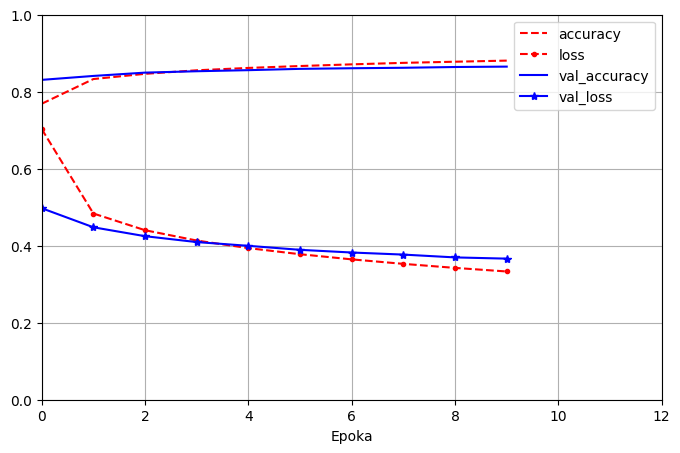

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 12], ylim=[0, 1], grid=True, xlabel="Epoka",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

Dokładność dla zestawu uczącego, jak i dla walidacyjnego stopniowo rosną w miarę
uczenia, natomiast błąd uczenia i walidacji maleją, co jest dobrym znakiem

Początkowo krzywe walidacji znajdują
się blisko siebie, ale w miarę upływu czasu oddalają się od siebie, co świadczy o nieznacznym
przetrenowaniu